<a href="https://colab.research.google.com/github/Daphey/Prime-Nest-Housing-Prediction/blob/main/LinearRegression_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Generation Code

In [ ]:
import pandas as pd
import numpy as np
import random
from google.colab import files


# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 2000

# Randomly generate features
def generate_sample():
    num_rooms = random.randint(1, 6)  # Number of rooms between 1 and 6
    parking_space = random.choice([0, 1, 2])  # 0 = no parking, 1 or 2 = number of parking spaces
    width = random.randint(30, 300)  # Width in square meters
    num_conveniences = random.randint(1, 4)  # Number of conveniences (1 to 4)
    building_age = random.randint(1, 50)  # Age of the building (in years)
    distance_to_center = random.randint(1, 50)  # Distance to city center (in km)
    location = random.randint(1, 5)  # Location code (1 = city center, 5 = outskirts)

    # Price generation (based on a simple model)
    base_price = 100000  # Base price for an apartment in the city center
    price = base_price + num_rooms * 50000 + parking_space * 20000 + width * 2000 + num_conveniences * 10000 - building_age * 1000 - distance_to_center * 5000 + location * 10000
    price = max(price, 10000)  # Ensure price is never negative

    return [num_rooms, parking_space, width, num_conveniences, building_age, distance_to_center, location, price]

# Create a DataFrame to store the dataset
columns = ['num_rooms', 'parking_space', 'width', 'num_conveniences', 'building_age', 'distance_to_center', 'location', 'price']
data = [generate_sample() for _ in range(n_samples)]

df = pd.DataFrame(data, columns=columns)

# Save dataset as CSV
df.to_csv('apartment_price_data.csv', index=False)

# Display the first few rows of the dataset
#df.head()

files.download('apartment_price_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('apartment_price_data.csv')

# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 1.3183009032829116e-19
Root Mean Squared Error: 3.6308413670703264e-10
R-squared: 1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('apartment_price_data.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,num_rooms,parking_space,width,num_conveniences,building_age,distance_to_center,location,price
num_rooms,1.000000,-0.007512,-0.004511,0.017519,0.024876,0.002892,-0.014260,0.439734
parking_space,-0.007512,1.000000,-0.005045,0.021010,-0.020759,-0.024147,0.002675,0.090047
width,-0.004511,-0.005045,1.000000,0.000912,-0.015184,0.035309,-0.004996,0.798286
num_conveniences,0.017519,0.021010,0.000912,1.000000,0.004774,0.059347,-0.035901,0.043143
building_age,0.024876,-0.020759,-0.015184,0.004774,1.000000,0.058824,0.013717,-0.098827
distance_to_center,0.002892,-0.024147,0.035309,0.059347,0.058824,1.000000,0.018243,-0.350349
location,-0.014260,0.002675,-0.004996,-0.035901,0.013717,0.018243,1.000000,0.053313
price,0.439734,0.090047,0.798286,0.043143,-0.098827,-0.350349,0.053313,1.000000


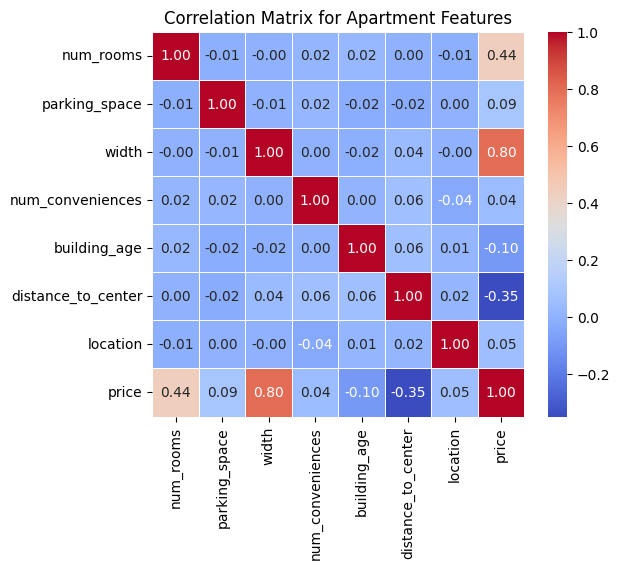

In [ ]:
# Plot the heatmap using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix for Apartment Features')

# Show the plot
plt.show()


# Code for Deployment

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('apartment_price_data.csv')

# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to load the model (you can later save and load a pre-trained model)
def load_model():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to make predictions based on user input
def predict_price(model, num_rooms, parking_space, width, num_conveniences, building_age, distance_to_center, location):
    # Prepare the input data as a DataFrame with the same column names as the training data
    input_data = pd.DataFrame({
        'num_rooms': [num_rooms],
        'parking_space': [parking_space],
        'width': [width],
        'num_conveniences': [num_conveniences],
        'building_age': [building_age],
        'distance_to_center': [distance_to_center],
        'location': [location]
    })
    prediction = model.predict(input_data)
    return prediction[0]


# Load your trained model (or retrain here if necessary)
model = load_model()

# Title and description of the app
st.title("Apartment Price Prediction")
st.write("""
    This app predicts the price of an apartment or building based on various features like the number of rooms,
    parking space, building age, and more.
""")

# Input fields for users to enter apartment features
num_rooms = st.slider("Number of Rooms", 1, 6, 3)
parking_space = st.selectbox("Parking Space", [0, 1, 2])  # 0 = no parking, 1 or 2 = number of spaces
width = st.slider("Width (in square meters)", 30, 300, 100)
num_conveniences = st.slider("Number of Conveniences", 1, 4, 2)
building_age = st.slider("Building Age (in years)", 1, 50, 10)
distance_to_center = st.slider("Distance to City Center (in km)", 1, 50, 10)
location = st.selectbox("Location (1 = City Center, 5 = Outskirts)", [1, 2, 3, 4, 5])

# Button to trigger the prediction
if st.button("Predict Price"):
    # Make the prediction using the model
    predicted_price = predict_price(model, num_rooms, parking_space, width, num_conveniences, building_age, distance_to_center, location)

    # Display the predicted price
    st.write(f"**Predicted Price:** ${predicted_price:,.2f}")


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 10000

# Generate TransactionID
transaction_ids = np.arange(1, n_samples + 1)

# Generate Amount (skewed towards smaller amounts)
amounts = np.random.exponential(scale=100, size=n_samples).round(2)

# Generate Time (in seconds since the first transaction)
times = np.cumsum(np.random.randint(1, 100, size=n_samples))

# Generate V1-V28 (anonymized features)
v_features = np.random.normal(0, 1, size=(n_samples, 28))
v_columns = [f'V{i+1}' for i in range(28)]

# Generate Class (fraud or not)
# Assume 1% of transactions are fraudulent
fraud_probability = 0.01
classes = np.random.binomial(1, fraud_probability, size=n_samples)

# Create DataFrame
data = pd.DataFrame({
    'TransactionID': transaction_ids,
    'Amount': amounts,
    'Time': times,
    **{v_columns[i]: v_features[:, i] for i in range(28)},
    'Class': classes
})

# Save to CSV
data.to_csv('fraud_detection_data.csv', index=False)
files.download('fraud_detection_data.csv')
# Display the first 5 rows
print(data.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   TransactionID  Amount  Time        V1        V2        V3        V4  \
0              1   46.93    55 -0.300891  1.114744  0.548856  0.461846   
1              2  301.01   151 -1.536041 -1.096117  0.770052  2.549536   
2              3  131.67   187 -2.297180 -0.127725  1.412496 -0.136369   
3              4   91.29   224  0.679208  0.081789  0.257603 -0.771108   
4              5   16.96   238 -0.470825 -0.567625 -0.475283 -0.830145   

         V5        V6        V7  ...       V20       V21       V22       V23  \
0  2.256001 -1.130950  0.709759  ... -0.507175  1.469455 -1.550794  1.819385   
1  0.575249  0.730087 -0.761265  ... -1.194291  0.505968  0.131485  0.738646   
2 -0.719065 -0.064646  0.099055  ...  0.470138 -1.031977 -0.146483 -0.062604   
3  0.449470  0.412669 -0.297803  ... -2.018892  0.521066  0.242281 -0.342637   
4 -0.770633  0.516091 -1.742694  ...  1.445417 -0.268074 -0.126688 -0.461230   

        V24       V25       V26       V27       V28  Class  
0  0.017983 -